In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

#### Functions

In [2]:
def plot_mean_by_pick(df_tmp, str_dirname_output):
    # get columns
    list_cols = [col for col in df_tmp.columns if col != 'pick_overall']
    
    # get nrows
    int_nrows = len(list_cols)
    
    # get figsize
    flt_height = 4 * int_nrows
    
    # make tuple
    tpl_figsize = (12, flt_height)
    
    # define iv
    x = df_tmp['pick_overall']

    # get min x
    int_x_min = df_tmp['pick_overall'].min()

    # get max x
    int_x_max = df_tmp['pick_overall'].max()

    # get xticks
    list_xticks = list(range(int_x_min, int_x_max+1))

    # get xtick labels
    list_xtick_labels = [str(t) if t % 5 == 0 else "" for t in list_xticks]
    
    # create subplots
    fig, ax = plt.subplots(nrows=int_nrows, figsize=tpl_figsize)
    # loop through cols
    for a, col in enumerate(list_cols):
        # ylabel
        if 'Proportion' not in col:
            str_ylabel = f'Average {col}'
        else:
            str_ylabel = col
        
        # title
        str_title = f'{str_ylabel} by Draft Pick'
        # set title
        ax[a].set_title(str_title)
        
        # set x-label
        ax[a].set_xlabel('Draft Pick')
        # set x-ticks
        ax[a].set_xticks(list_xticks)
        # set x-tick labels
        ax[a].set_xticklabels(list_xtick_labels)
        # set lim
        ax[a].set_xlim(int_x_min-1, int_x_max)

        # set y-label
        ax[a].set_ylabel(str_ylabel)
        # plot
        ax[a].plot(x, df_tmp[col])
    
    # fix overlap
    fig.tight_layout()
    
    # save
    str_filename = 'plt_mean_by_pick.png'
    str_filepath = f'{str_dirname_output}/{str_filename}'
    plt.savefig(str_filepath, bbox_inches='tight')
    
    # show
    plt.show()

#### Constants

In [3]:
str_dirname_output = './output'

list_cols_fill_zero = [
    'seasons',
    'g',
    'mp',
    'pts',
    'trb',
    'ast',
    'mp_per_g',
    'pts_per_g',
    'trb_per_g',
    'ast_per_g',
]

#### Output

In [4]:
try:
    os.mkdir(str_dirname_output)
except FileExistsError:
    pass

#### Create data set

##### Import draft picks

In [5]:
str_filename = 'df.csv'
str_filepath = f'../01_scrape_drafts/output/{str_filename}'
df = pd.read_csv(str_filepath)

# drop skip col
df.drop('skip', axis=1, inplace=True)

# drop everything before 1989 because drafts before that had a lot of picks
df = df[df['year'] >= 1989].copy()

# drop any picks missing (forfeited)
df.dropna(subset=['pick_overall'], inplace=True)

# set pick to int
df['pick_overall'] = df['pick_overall'].astype(int)

# fillna with 0
df[list_cols_fill_zero] = df[list_cols_fill_zero].fillna(0)

# get total sample size
int_n = df.shape[0]
print(f'Total sample size: {int_n}')

# show
df

Total sample size: 1562


,pick_overall,team_id,player,college_name,seasons,g,mp,pts,trb,ast,...,ft_pct,mp_per_g,pts_per_g,trb_per_g,ast_per_g,ws,ws_per_48,bpm,vorp,year
1806,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,4494.0,3170.0,691.0,...,0.689,24.5,9.5,6.7,1.5,21.8,0.090,-0.5,4.4,1989
1807,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,2550.0,1185.0,...,0.840,19.8,7.0,2.8,1.3,34.8,0.092,-0.9,4.9,1989
1808,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,10544.0,3204.0,1897.0,...,0.799,33.0,14.2,4.3,2.6,55.7,0.109,0.2,13.5,1989
1809,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,18336.0,4387.0,2097.0,...,0.846,35.0,18.3,4.4,2.1,88.7,0.122,0.8,24.9,1989
1810,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,5680.0,3381.0,639.0,...,0.716,22.9,8.5,5.0,1.0,22.5,0.070,-2.9,-3.7,1989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,56,NOP,Branden Dawson,Michigan State,1.0,6.0,29.0,5.0,4.0,0.0,...,1.000,4.8,0.8,0.7,0.0,0.0,0.069,-5.7,0.0,2015
3422,57,DEN,Nikola Radičević,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2015
3423,58,PHI,J.P. Tokoto,UNC,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2015
3424,59,ATL,Dimitrios Agravanis,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2015


##### Import all stars

In [6]:
str_filename = 'df.csv'
str_filepath = f'../02_scrape_all_stars/output/{str_filename}'
df_tmp = pd.read_csv(str_filepath)

# get list of all stars
list_str_all_stars = list(df_tmp['player'].unique())
int_len = len(list_str_all_stars)
print(f'There are {int_len} unique all stars')

# get list of multi-time all stars
ser_val_counts = df_tmp['player'].value_counts()
list_str_multi_all_stars = list(ser_val_counts[ser_val_counts > 1].index)
int_len = len(list_str_multi_all_stars)
print(f'There are {int_len} unique multi all stars')

There are 288 unique all stars
There are 188 unique multi all stars


##### Import MVPs

In [7]:
str_filename = 'df.csv'
str_filepath = f'../03_scrape_mvps/output/{str_filename}'
df_tmp = pd.read_csv(str_filepath)

# get list of mvps
list_str_mvps = list(df_tmp['player'].unique())
int_len = len(list_str_mvps)
print(f'There are {int_len} unique MVPs')

# get list of multi-time mvps
ser_val_counts = df_tmp['player'].value_counts()
list_str_multi_mvps = list(ser_val_counts[ser_val_counts > 1].index)
int_len = len(list_str_multi_mvps)
print(f'There are {int_len} unique multi MVPs')

There are 37 unique MVPs
There are 15 unique multi MVPs


##### Create tags

In [8]:
# all star
df['all_star'] = df['player'].apply(
    lambda x: 1 if x in list_str_all_stars else 0,
)
flt_mn = df['all_star'].mean()
print(f'Proportion all star: {flt_mn:0.4f}')

# multi all star
df['multi_all_star'] = df['player'].apply(
    lambda x: 1 if x in list_str_multi_all_stars else 0,
)
flt_mn = df['multi_all_star'].mean()
print(f'Proportion multi all star: {flt_mn:0.4f}')

# mvp
df['mvp'] = df['player'].apply(
    lambda x: 1 if x in list_str_mvps else 0,
)
flt_mn = df['mvp'].mean()
print(f'Proportion MVP: {flt_mn:0.4f}')

# multi mvp
df['multi_mvp'] = df['player'].apply(
    lambda x: 1 if x in list_str_multi_mvps else 0,
)
flt_mn = df['multi_mvp'].mean()
print(f'Proportion multi MVP: {flt_mn:0.4f}')

# show
df

Proportion all star: 0.0999
Proportion multi all star: 0.0685
Proportion MVP: 0.0102
Proportion multi MVP: 0.0038


,pick_overall,team_id,player,college_name,seasons,g,mp,pts,trb,ast,...,ast_per_g,ws,ws_per_48,bpm,vorp,year,all_star,multi_all_star,mvp,multi_mvp
1806,1,SAC,Pervis Ellison,Louisville,11.0,474.0,11593.0,4494.0,3170.0,691.0,...,1.5,21.8,0.090,-0.5,4.4,1989,0,0,0,0
1807,2,LAC,Danny Ferry,Duke,13.0,917.0,18133.0,6439.0,2550.0,1185.0,...,1.3,34.8,0.092,-0.9,4.9,1989,0,0,0,0
1808,3,SAS,Sean Elliott,Arizona,12.0,742.0,24502.0,10544.0,3204.0,1897.0,...,2.6,55.7,0.109,0.2,13.5,1989,1,1,0,0
1809,4,MIA,Glen Rice,Michigan,15.0,1000.0,34985.0,18336.0,4387.0,2097.0,...,2.1,88.7,0.122,0.8,24.9,1989,1,1,0,0
1810,5,CHH,J.R. Reid,UNC,11.0,672.0,15370.0,5680.0,3381.0,639.0,...,1.0,22.5,0.070,-2.9,-3.7,1989,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,56,NOP,Branden Dawson,Michigan State,1.0,6.0,29.0,5.0,4.0,0.0,...,0.0,0.0,0.069,-5.7,0.0,2015,0,0,0,0
3422,57,DEN,Nikola Radičević,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,2015,0,0,0,0
3423,58,PHI,J.P. Tokoto,UNC,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,2015,0,0,0,0
3424,59,ATL,Dimitrios Agravanis,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,NaN,NaN,NaN,2015,0,0,0,0


#### Group data

In [9]:
list_cols = [
    'seasons',
    'mp_per_g',
    'pts_per_g',
    'trb_per_g',
    'ast_per_g',
    'vorp',
    'all_star',
    'multi_all_star',
    'mvp',
]
# create dict
dict_agg = {col: 'mean' for col in list_cols}

# group
df_tmp = df.groupby(by='pick_overall', as_index=False).agg(dict_agg)

# sort
df_tmp.sort_values(by='pick_overall', ascending=True, inplace=True)

# show
#df_tmp

#### Rename for plotting

In [10]:
dict_rename = {
    'seasons': 'Seasons Played',
    'mp_per_g': 'Minutes per Game',
    'pts_per_g': 'Points per Game',
    'trb_per_g': 'Rebounds per Game',
    'ast_per_g': 'Assists per Game',
    'vorp': 'VORP',
    'all_star': 'Proportion All-Star',
    'multi_all_star': 'Proportion Multi All-Star',
    'mvp': 'Proportion MVP',
}
df_tmp.rename(columns=dict_rename, inplace=True)

# show
df_tmp

,pick_overall,Seasons Played,Minutes per Game,Points per Game,Rebounds per Game,Assists per Game,VORP,Proportion All-Star,Proportion Multi All-Star,Proportion MVP
0,1,13.074074,31.129630,16.629630,7.248148,2.922222,30.107407,0.703704,0.592593,0.185185
1,2,11.925926,27.837037,12.377778,5.507407,2.759259,18.051852,0.407407,0.222222,0.037037
2,3,12.592593,29.692593,14.929630,5.248148,3.255556,22.796296,0.555556,0.481481,0.074074
3,4,13.037037,29.011111,13.418519,5.422222,2.925926,19.714815,0.370370,0.296296,0.037037
4,5,12.962963,25.677778,11.777778,4.892593,2.466667,17.811111,0.333333,0.222222,0.037037
5,6,8.592593,24.944444,10.255556,4.403704,1.951852,6.218519,0.222222,0.111111,0.000000
6,7,11.666667,26.270370,11.422222,4.381481,2.566667,9.411111,0.148148,0.148148,0.037037
7,8,9.740741,22.722222,9.107407,3.785185,1.792593,5.444444,0.037037,0.037037,0.000000
8,9,11.296296,23.366667,10.425926,4.848148,1.914815,14.970370,0.370370,0.296296,0.037037
9,10,11.592593,24.807407,10.674074,4.088889,2.488889,12.337037,0.259259,0.148148,0.000000


#### Create plots

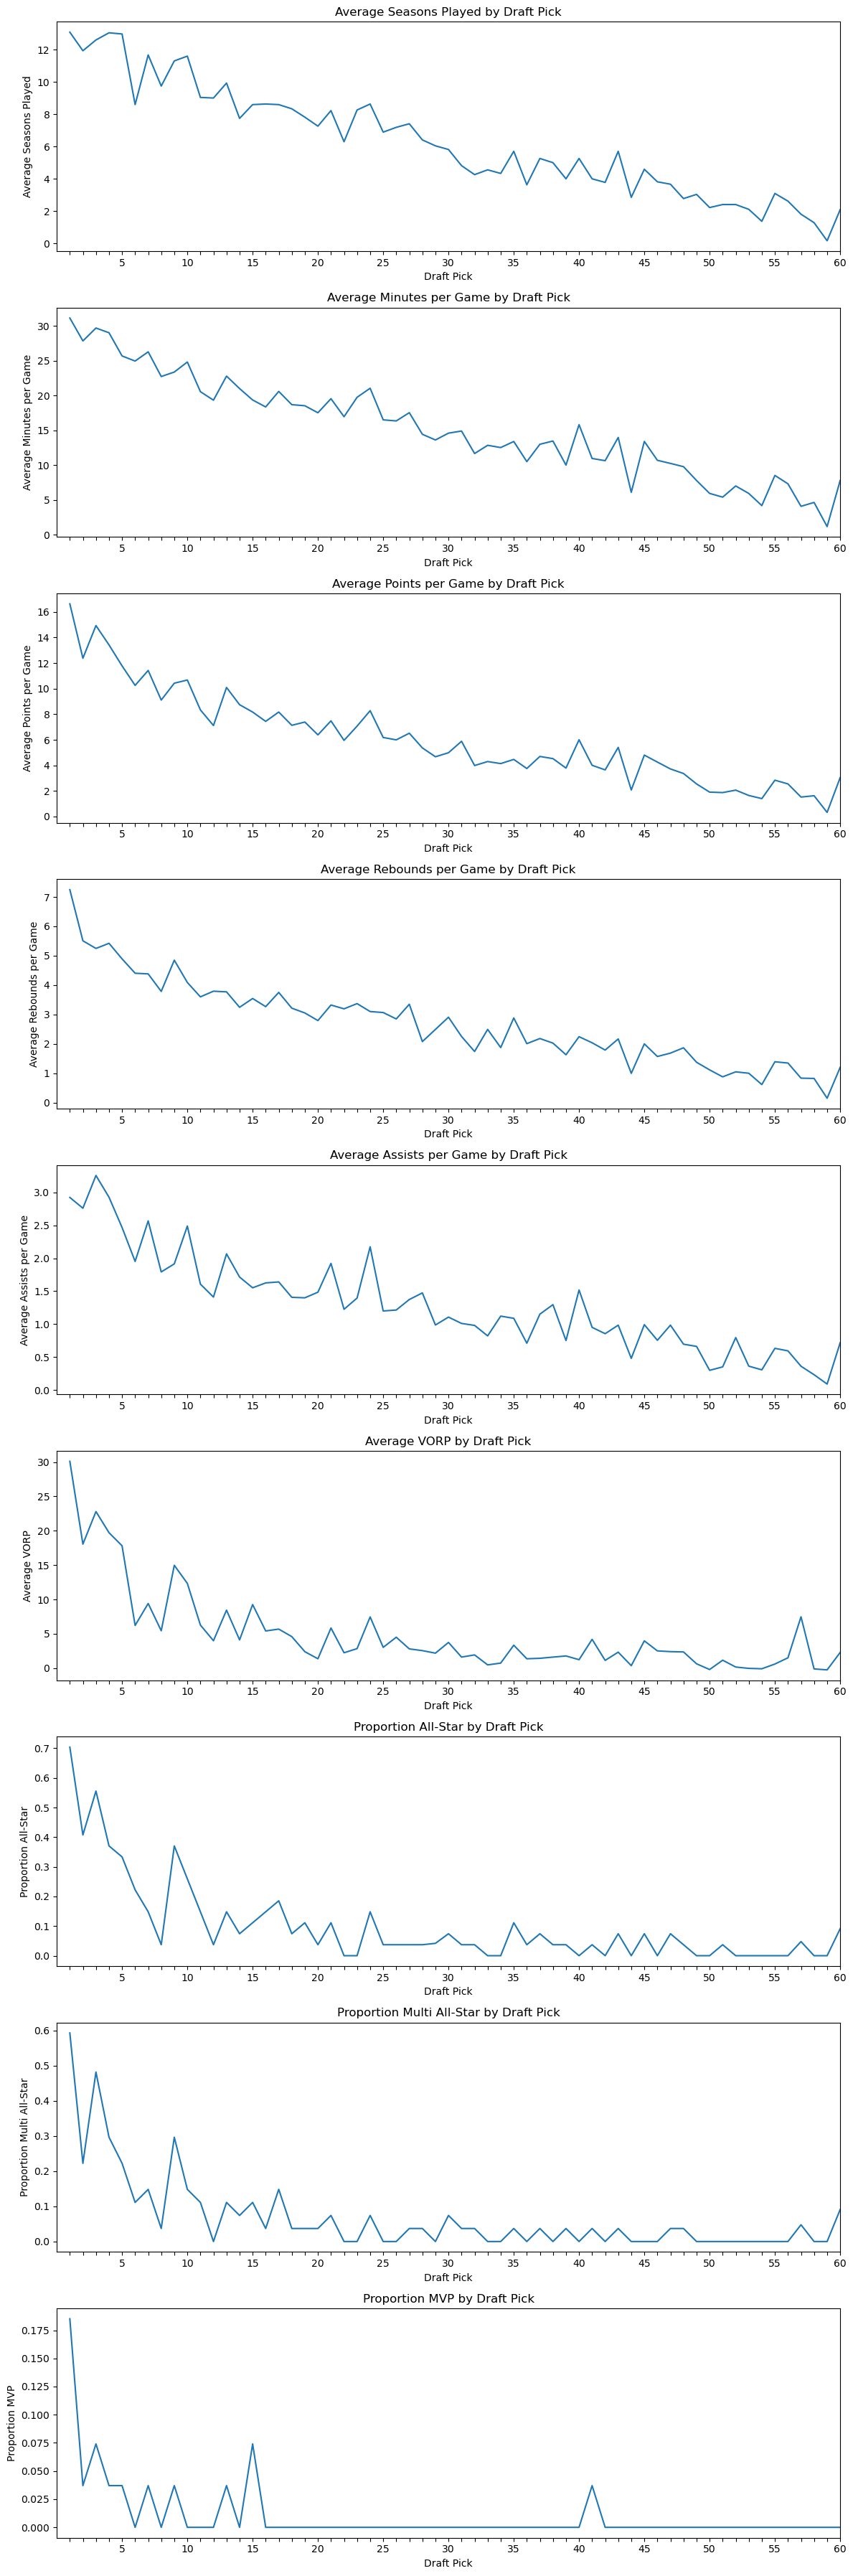

In [11]:
plot_mean_by_pick(
    df_tmp=df_tmp,
    str_dirname_output=str_dirname_output,
)